### Detect Data Drift
**Description**: Data drift can occur when the statistical properties of your data change over time. Learn to detect data drift using visualizations.

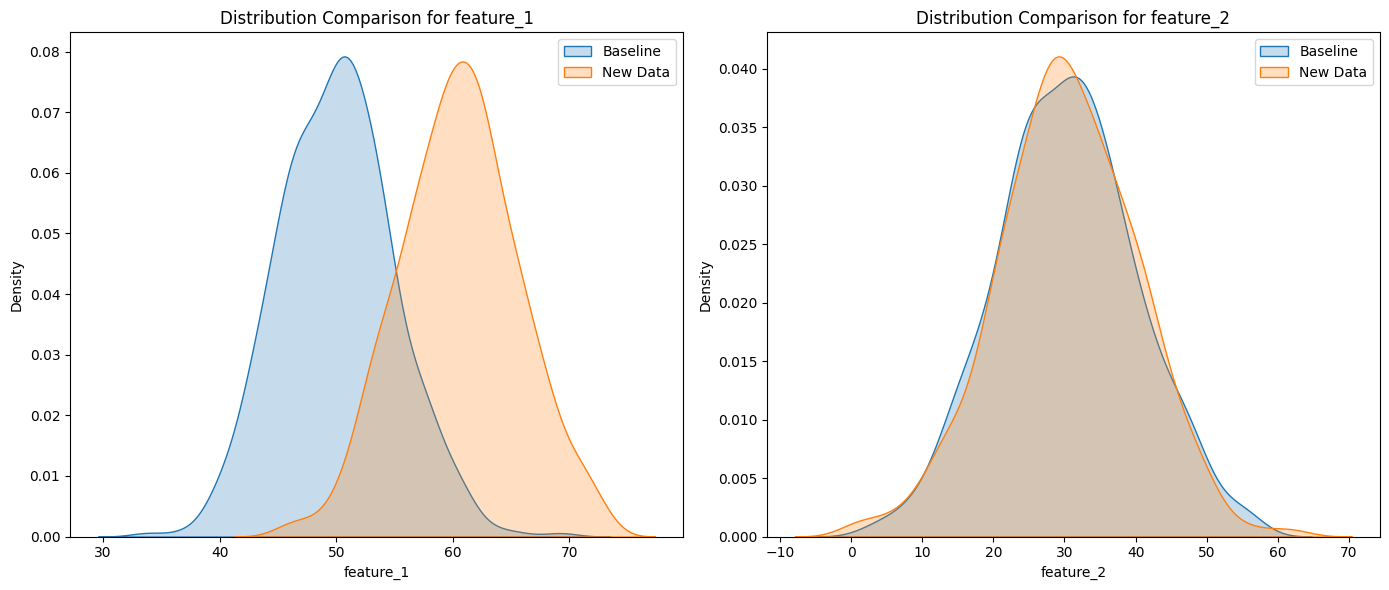

In [1]:
# Write your code from here

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Simulate original data (baseline)
np.random.seed(42)
baseline_data = pd.DataFrame({
    'feature_1': np.random.normal(loc=50, scale=5, size=500),
    'feature_2': np.random.normal(loc=30, scale=10, size=500)
})

# Simulate new data with drift (mean shift in feature_1)
new_data = pd.DataFrame({
    'feature_1': np.random.normal(loc=60, scale=5, size=500),  # mean shifted by +10
    'feature_2': np.random.normal(loc=30, scale=10, size=500)  # no drift here
})

# Plot distributions to visualize drift
plt.figure(figsize=(14,6))

for i, feature in enumerate(['feature_1', 'feature_2'], 1):
    plt.subplot(1, 2, i)
    sns.kdeplot(baseline_data[feature], label='Baseline', fill=True)
    sns.kdeplot(new_data[feature], label='New Data', fill=True)
    plt.title(f'Distribution Comparison for {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.legend()

plt.tight_layout()
plt.show()